In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt


# Load datasets

In [3]:
user_ratings = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Original Data/The Movies Dataset/ratings_small.csv')

movie_text = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_cats.csv', index_col=0)

actors_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_actors.csv', index_col=0)
directors_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_directors.csv', index_col=0)
genres_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_genres.csv', index_col=0)
num_stats_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_ints.csv', index_col=0)
nat_lang_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_nat_lang.csv', index_col=0)
prod_comp_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_prodcomp.csv', index_col=0)
rel_year_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/release_year.csv', index_col=0)
tags_df = pd.read_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/movie_tags.csv', index_col=0)


In [4]:
# drop title column 

tags_df.drop('title', axis=1, inplace=True)
prod_comp_df.drop('title', axis=1, inplace=True)
nat_lang_df.drop('title', axis=1, inplace=True)
num_stats_df.drop('title', axis=1, inplace=True)
genres_df.drop('title', axis=1, inplace=True)
actors_df.drop('title', axis=1, inplace=True)

In [5]:
# dropping some redundant columns 
nat_lang_df.drop(['foreign_lang', 'foreign_film'], axis=1, inplace=True)
rel_year_df.drop(['release year'], axis=1, inplace=True)

# Scaling the numerical data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
nu = scaler.fit_transform(num_stats_df)
num_scale = pd.DataFrame(nu)

In [8]:
# give columns proper names 

num_scale.drop([0], axis=1, inplace=True)
num_scale.rename(columns={1:'runtime', 2:'budget', 3:'revenue', 4:'vote_average', 5:'vote_count', 6:'popularity'}, inplace=True)

# Merge Datasets into one

In [9]:
# put all dataframes in a list

data_frames = [actors_df, directors_df, genres_df, nat_lang_df, prod_comp_df, rel_year_df, tags_df]

In [10]:
# clean merge of all the dataframes 

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='outer'), data_frames)

In [11]:
df_merged = df_merged.join(num_scale, how='outer')

In [12]:
df_merged

,id,John Wayne,Jackie Chan,Michael Caine,Robert De Niro,Gérard Depardieu,Christopher Lee,Nicolas Cage,Bette Davis,James Mason,...,college,student,comedy,fight,runtime,budget,revenue,vote_average,vote_count,popularity
0,862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.485780,1.469769,5.602097,1.083651,10.741726,3.155036
1,8844,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.190119,3.468693,3.889186,0.666062,4.662118,2.336504
2,15602,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.101958,-0.243594,-0.175109,0.457267,-0.038338,1.456352
3,31357,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.866018,0.670200,1.084591,0.248473,-0.155799,0.152815
4,11862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.248893,-0.243594,1.009223,0.039678,0.125702,0.904393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44979,439050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.221297,-0.243594,-0.175109,-0.847699,-0.222630,-0.475838
44980,111109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.713164,-0.243594,-0.175109,1.762234,-0.218579,-0.458213
44981,67758,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.221297,-0.243594,-0.175109,-0.952097,-0.212504,-0.337913
44982,227506,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.309458,-0.243594,-0.175109,-2.935646,-0.224655,-0.487216


In [13]:
# reduced df 
framez = [genres_df, nat_lang_df, prod_comp_df, rel_year_df]
df_redux = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='outer'), framez)
                                            

In [14]:
# checking out how many films have no 'tag' information 
tagss = tags_df.drop(['id'], axis=1)

lst = tagss.sum(axis=1)
lst = sorted(lst)

ohs = [] 
for i in lst:
    if i == 0:
        ohs.append(i)

len(ohs) 

25975

In [15]:
# checking out how many films have no 'genre' information 
genress = genres_df.drop(['id'], axis=1)

lst = genress.sum(axis=1)
lst = sorted(lst)

ohs = [] 
for i in lst:
    if i == 0:
        ohs.append(i)

len(ohs) 

2383

In [17]:
# checking out how many films have no 'release year info' information 
yearr = rel_year_df.drop(['id'], axis=1)

lst = yearr.sum(axis=1)
lst = sorted(lst)

ohs = [] 
for i in lst:
    if i == 0:
        ohs.append(i)

len(ohs) 

0

In [18]:
df_redux.to_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/df_redux.csv')

In [19]:
letters_in_dataframe = "Jackie Chan" in (actors_df & directors_df)
letters_in_dataframe

True

Looks like 'Jackie Chan' is in the name of multiple columns... might there be more?

# Feature Engineering 

In [20]:
doubles = [col for col in df_merged.columns if '_x' in col]
print(doubles)
print(len(doubles))

doubles = [col for col in df_merged.columns if '_y' in col]
print(doubles)
print(len(doubles))

['Clint Eastwood_x', 'Buster Keaton_x', 'Charlie Chaplin_x']
3
['Charlie Chaplin_y', 'Clint Eastwood_y', 'Buster Keaton_y']
3


most of these insances are directors that are also actors, let's figure out what to do 

In [ ]:
# testing to see if there's a column that can be dropped 

test_df = df_merged[['Buster Keaton_x', 'Buster Keaton_y']]

test_df = test_df[test_df['Buster Keaton_y'] == 1 ]

test_df.head(60)

I can drop: Jackie Chan_y, Georges Méliès_y, Carlo Verdone_y, Til Schweiger_y, James Franco_y because all of the movies they direct(represented by the '_y', they also act in.)

Need to reconcile: Werner Herzog, Woody Allen, Charlie Chaplin, Clint Eastwood, Buster Keaton, Orson Welles, Sammo Hung, Kenneth Branagh, Jerry Lewis, Richard Attenborough, Stephen Chow, Robert Redford, Gene Kelly.

In [285]:
# drop unnecessary columns 
# df_merged.drop(['Jackie Chan_y', 'Georges Méliès_y', 'Carlo Verdone_y', 'Til Schweiger_y', 'James Franco_y'], axis=1, inplace=True)

In [286]:
# rename columns 
# df_merged.rename(columns={'Jackie Chan_x': 'Jackie Chan', 'Georges Méliès_x': 'Georges Méliès', 'Carlo Verdone_x': 'Carlo Verdone', 'Til Schweiger_x': 'Til Schweiger', 'James Franco_x': 'James Franco'}, inplace=True)

In [22]:
def act_dir(row, _x, _y):
    if row[_x] == 1 or row[_y] == 1: return 1
    # elif row['prod_comp1'] == altname or row['prod_comp2'] == altname: return 1
    else: return 0

In [23]:
# make new columns that are a combo of director and actor columns where either one had a '1' value

# df_merged['Werner Herzog'] = df_merged.apply(lambda x: act_dir(x, 'Werner Herzog_x', 'Werner Herzog_y'), axis=1)
# df_merged['Woody Allen'] = df_merged.apply(lambda x: act_dir(x, 'Woody Allen_x', 'Woody Allen_y'), axis=1)
df_merged['Charlie Chaplin'] = df_merged.apply(lambda x: act_dir(x, 'Charlie Chaplin_x', 'Charlie Chaplin_y'), axis=1)
df_merged['Clint Eastwood'] = df_merged.apply(lambda x: act_dir(x, 'Clint Eastwood_x', 'Clint Eastwood_y'), axis=1)
df_merged['Buster Keaton'] = df_merged.apply(lambda x: act_dir(x, 'Buster Keaton_x', 'Buster Keaton_y'), axis=1)
# df_merged['Orson Welles'] = df_merged.apply(lambda x: act_dir(x, 'Orson Welles_x', 'Orson Welles_y'), axis=1)
# df_merged['Sammo Hung'] = df_merged.apply(lambda x: act_dir(x, 'Sammo Hung_x', 'Sammo Hung_y'), axis=1)
# df_merged['Kenneth Branagh'] = df_merged.apply(lambda x: act_dir(x, 'Kenneth Branagh_x', 'Kenneth Branagh_y'), axis=1)
# df_merged['Jerry Lewis'] = df_merged.apply(lambda x: act_dir(x, 'Jerry Lewis_x', 'Jerry Lewis_y'), axis=1)
# df_merged['Richard Attenborough'] = df_merged.apply(lambda x: act_dir(x, 'Richard Attenborough_x', 'Richard Attenborough_y'), axis=1)
# df_merged['Stephen Chow'] = df_merged.apply(lambda x: act_dir(x, 'Stephen Chow_x', 'Stephen Chow_y'), axis=1)
# df_merged['Robert Redford'] = df_merged.apply(lambda x: act_dir(x, 'Robert Redford_x', 'Robert Redford_y'), axis=1)
# df_merged['Gene Kelly'] = df_merged.apply(lambda x: act_dir(x, 'Gene Kelly_x', 'Gene Kelly_y'), axis=1)

In [24]:
# drop old rows (old one)
# df_merged.drop(['Clint Eastwood_x', 'Buster Keaton_x', 'Charlie Chaplin_x', 'Woody Allen_x', 'Robert Redford_x', 'Orson Welles_x', 'Sammo Hung_x', 'Jerry Lewis_x', 'Werner Herzog_x', 'Kenneth Branagh_x', 'Gene Kelly_x', 'Richard Attenborough_x', 'Stephen Chow_x'], axis=1, inplace=True)
# df_merged.drop(['Clint Eastwood_y', 'Buster Keaton_y', 'Charlie Chaplin_y', 'Woody Allen_y', 'Robert Redford_y', 'Orson Welles_y', 'Sammo Hung_y', 'Jerry Lewis_y', 'Werner Herzog_y', 'Kenneth Branagh_y', 'Gene Kelly_y', 'Richard Attenborough_y', 'Stephen Chow_y'], axis=1, inplace=True)

In [25]:
df_merged.drop(['Clint Eastwood_x', 'Buster Keaton_x', 'Charlie Chaplin_x'], axis=1, inplace=True)
df_merged.drop(['Clint Eastwood_y', 'Buster Keaton_y', 'Charlie Chaplin_y'], axis=1, inplace=True)

In [26]:
# same process for years (unnecesary now because 'tags' df was reduced)

# df_merged['1970s'] = df_merged.apply(lambda x: act_dir(x, '1970s_x', '1970s_y'), axis=1)
# df_merged['1960s'] = df_merged.apply(lambda x: act_dir(x, '1960s_x', '1960s_y'), axis=1)
# df_merged['1980s'] = df_merged.apply(lambda x: act_dir(x, '1980s_x', '1980s_y'), axis=1)
# df_merged['1950s'] = df_merged.apply(lambda x: act_dir(x, '1950s_x', '1950s_y'), axis=1)
# df_merged['1940s'] = df_merged.apply(lambda x: act_dir(x, '1940s_x', '1940s_y'), axis=1)
# df_merged['1930s'] = df_merged.apply(lambda x: act_dir(x, '1930s_x', '1930s_y'), axis=1)

In [27]:
# (unnecesary now because 'tags' df was reduced)

# df_merged.drop(['1980s_x', '1970s_x', '1960s_x', '1950s_x', '1940s_x', '1930s_x'], axis = 1, inplace = True)
# df_merged.drop(['1980s_y', '1970s_y', '1960s_y', '1950s_y', '1940s_y', '1930s_y'], axis = 1, inplace = True)

In [28]:
# save our dataset

df_merged.to_csv('/Users/spence/Documents/GitHub/Movie Recommender System/Saved Datasets/df_merged.csv')

# Lets do some Preprocessing 

In [29]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

I will examine two datasets in the following eexercises. 

One is a highly reduced DataFrame consisting only of 'genres', 'release years', 'production companies', 'language'.

The next one includes all of the above plus the top 100 actors, 100 directors, and 100 subject tags. 

In [31]:
# larger frame
df = df_merged.copy()
df.drop(['id'],axis=1,inplace=True)

df_numpy2 = df.to_numpy()

In [32]:
# reduced frame
df = df_redux.copy()
df.drop(['id'],axis=1,inplace=True)

In [33]:
# create numpy array 
df_numpy = df.to_numpy()


# setting the algorithm parameters
kmeans = KMeans(
init="random",
n_clusters=100,
n_init=10,
max_iter=1000,
random_state=42)

In [34]:
# fit to data array
kmeans.fit(df_numpy)

# The lowest SSE value
kmeans.inertia_

58340.36458404076

In [35]:
# Location of the centroids (cluster centers)

kmeans.cluster_centers_

array([[ 7.66355140e-02,  5.60747664e-03,  1.12149533e-02, ...,
         1.00000000e+00, -1.11022302e-16, -6.93889390e-18],
       [ 3.05755396e-02,  4.31654676e-02,  5.57553957e-02, ...,
         2.22044605e-16, -1.11022302e-16, -1.38777878e-17],
       [ 4.27906977e-01,  7.67441860e-02,  2.32558140e-03, ...,
         2.77555756e-16, -5.55111512e-17,  3.46944695e-18],
       ...,
       [ 3.14960630e-02,  7.08661417e-02,  0.00000000e+00, ...,
         1.66533454e-16, -1.11022302e-16, -6.93889390e-18],
       [ 0.00000000e+00,  1.12359551e-02,  2.24719101e-02, ...,
         0.00000000e+00,  7.19101124e-01,  1.12359551e-02],
       [ 4.74452555e-02,  7.29927007e-03, -2.77555756e-17, ...,
         3.88578059e-16,  1.00000000e+00, -1.73472348e-17]])

In [36]:
# The number of iterations required to converge

kmeans.n_iter_

29

Here we will attempt to find an appropriate number of clusters

In [37]:
# setting key-word arguments

kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 1000,
        "random_state": 42,}


# making a list of sum of squared errors for different cluster amounts (1-19)

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_numpy)
    sse.append(kmeans.inertia_)

sse 

[142361.42650720317,
 128120.23474743837,
 121012.73595061898,
 115738.21047777227,
 112018.07063503926,
 107524.18403082372,
 105085.72606476388,
 103270.8772958457,
 101290.97883633894,
 99414.2154076739,
 97505.81871297155,
 95845.31485094619,
 93838.39786476413,
 92947.53961100423,
 91690.1188657461,
 90223.89149850316,
 88931.39629646763,
 87853.06706180632,
 86731.73908456227]

It looks like as we make more clusters, the sum of squared errors drops.

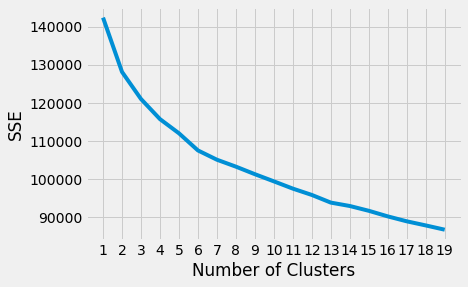

In [38]:
# plotting the above info 

plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

For larger set we saw an elbow at 4 and another sharp elbow at 13.

For smaller set we see an elbow at 6 and another at 13.

In [39]:
# Creating a list of silhouette coefficients

silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_numpy)
    score = silhouette_score(df_numpy, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.10685452997099988,
 0.09963077544251335,
 0.08809217416927327,
 0.08592764248805745,
 0.1020678760253178,
 0.10066949857908866,
 0.10081907009099308,
 0.09589829001504534,
 0.09657945771411233,
 0.08815235407893371,
 0.09445892090551235,
 0.09959346488321114,
 0.0923667771555453,
 0.10130674164288554,
 0.09619143790128312,
 0.10252131414962415,
 0.10546249829554719,
 0.10365172694401342]

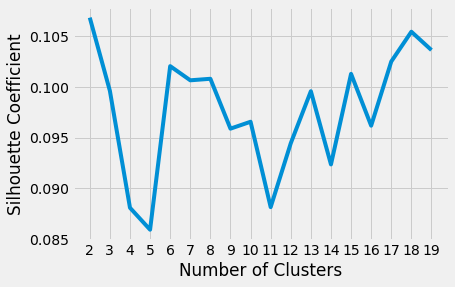

In [40]:
# plotting the above 

plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

For the smaller set, 18 clusters generates a good score 

In [41]:

# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=20)
dbscan = DBSCAN(eps=0.1)

# Fit the algorithms to the features
kmeans.fit(df_numpy)
dbscan.fit(df_numpy)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(df_numpy, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(df_numpy, dbscan.labels_).round (2)

# comapring the KMeans and DBscan silhouette scores
kmeans_silhouette, dbscan_silhouette

(0.11, 0.43)

The higher score suggests a better fit.

For the larger set, the KMeans score was higher.

For the smaller set, the DBScan score is higher.

# Lets do some PCA 

In [42]:
import sklearn.decomposition
import matplotlib.colors
import sklearn.cluster as cluster

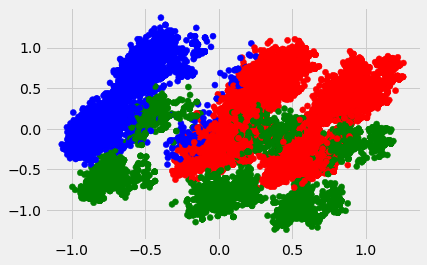

In [43]:
#smaller set 

# Make a variable called model. We want n_clusters = 3 as parameter to sklearn.cluster.KMeans 
model= cluster.KMeans(n_clusters=3, random_state=10)
# Call a fit_predict() on X 
cluster_assignments = model.fit_predict(df_numpy)

# Let's visualiaze with colors.ListedColormap
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(df_numpy))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

0         2
2049      9
4098      2
32      238
2081      2
       ... 
1983      2
4062      2
2015      3
4094      2
2047      3
Length: 4476, dtype: int64


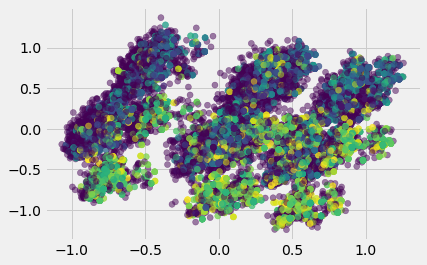

In [44]:
# smaller set

DBSCANNED = DBSCAN(eps=.1, min_samples=2).fit(df_numpy)
labels = pd.Series(DBSCANNED.labels_)
print(labels.value_counts(sort=False))

plt.scatter(pc1, pc2, c=labels.tolist(), alpha=0.5)
plt.show()

Now for the larger set

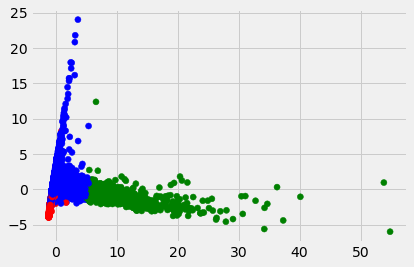

In [45]:
# larger set 

# Make a variable called model. We want n_clusters = 3 as parameter to sklearn.cluster.KMeans 
model= cluster.KMeans(n_clusters=3, random_state=10)
# Call a fit_predict() on X 
cluster_assignments = model.fit_predict(df_numpy2)

# Let's visualiaze with colors.ListedColormap
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(df_numpy2))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

0       3
32      3
64      2
96      2
128     3
       ..
895     2
927     2
959     2
991     3
1023    2
Length: 1037, dtype: int64


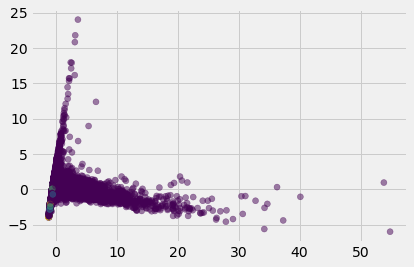

In [46]:
# larger set

DBSCANNED = DBSCAN(eps=.1, min_samples=2).fit(df_numpy2)
labels = pd.Series(DBSCANNED.labels_)
print(labels.value_counts(sort=False))

plt.scatter(pc1, pc2, c=labels.tolist(), alpha=0.5)
plt.show()

# Now for the ratings Dataset

In [47]:
user_ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


The user_ratings will be used for our 'collaborative filtering' model. Being that we have film ratings from users this is a supervised learning problem, in which case we can perform cross validation to help select a model. 

In [48]:
# use the Surpirse library to perform cross-validation 

from surprise import Reader, Dataset, SVD, KNNWithMeans, NMF 
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [49]:
reader = Reader()
data = Dataset.load_from_df(user_ratings[['userId', 'movieId', 'rating']], reader)

In [50]:
# test out Singular Value Decompostion 

svd = SVD()

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8967  0.8804  0.9008  0.9076  0.8951  0.8961  0.0090  
MAE (testset)     0.6897  0.6810  0.6921  0.6992  0.6898  0.6904  0.0058  
Fit time          3.53    3.48    3.49    3.49    3.49    3.50    0.02    
Test time         0.09    0.13    0.09    0.09    0.13    0.11    0.02    


{'test_rmse': array([0.89673675, 0.88035642, 0.90079348, 0.90759402, 0.89512764]),
 'test_mae': array([0.68965663, 0.68102857, 0.69212196, 0.69923612, 0.68979208]),
 'fit_time': (3.5274641513824463,
  3.4819579124450684,
  3.4863460063934326,
  3.4869072437286377,
  3.49408221244812),
 'test_time': (0.09068584442138672,
  0.1336669921875,
  0.08677005767822266,
  0.08697080612182617,
  0.13149380683898926)}

In [51]:
# test NMF 

nmf = NMF()
cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9488  0.9500  0.9392  0.9505  0.9448  0.9467  0.0043  
MAE (testset)     0.7276  0.7291  0.7216  0.7337  0.7251  0.7274  0.0040  
Fit time          3.88    3.93    3.91    3.90    3.90    3.90    0.02    
Test time         0.08    0.07    0.13    0.08    0.13    0.10    0.03    


{'test_rmse': array([0.94883427, 0.95000828, 0.93915611, 0.95053267, 0.94482587]),
 'test_mae': array([0.72755588, 0.72906739, 0.72164734, 0.73369927, 0.72509191]),
 'fit_time': (3.8808701038360596,
  3.927581787109375,
  3.907292127609253,
  3.8953471183776855,
  3.89909291267395),
 'test_time': (0.07834696769714355,
  0.07492208480834961,
  0.12880682945251465,
  0.0754239559173584,
  0.12823820114135742)}

In [52]:
# test KNN With Means

knnwm = KNNWithMeans()
cross_validate(knnwm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9291  0.9143  0.9109  0.9192  0.9209  0.9189  0.0062  
MAE (testset)     0.7088  0.7020  0.6967  0.7047  0.7050  0.7034  0.0040  
Fit time          0.10    0.13    0.11    0.11    0.11    0.11    0.01    
Test time         0.98    1.05    0.97    0.97    1.03    1.00    0.03    


{'test_rmse': array([0.92908582, 0.9143202 , 0.91086011, 0.91922989, 0.9208561 ]),
 'test_mae': array([0.70880294, 0.70201241, 0.6967265 , 0.70469589, 0.70496506]),
 'fit_time': (0.0999000072479248,
  0.13088464736938477,
  0.11413002014160156,
  0.11279821395874023,
  0.10820603370666504),
 'test_time': (0.9834141731262207,
  1.049010992050171,
  0.9680049419403076,
  0.9667270183563232,
  1.0304439067840576)}

It looks like the SVD cross-validation had the lowest error score and therefore is the most accurate. 

# Conclusion: 

For our modelling notebook, we will try both Kmeans and DBScan for clustering and see which creates better clusters when it comes time to recommend. We will use Singular Value Decomposition and KNN for collaborative filtering. 